In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/customer_churn_dataset-testing-master.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [5]:
df=df.drop(columns={"Gender","Subscription Type","Contract Length",})

In [6]:
df.sample()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
7937,7938,29,5,2,7,17,375,13,1


In [7]:
x=df.drop(columns="Churn")
y=df["Churn"]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((51499, 8), (12875, 8), (51499,), (12875,))

In [12]:
xtrain_trans=scaler.fit_transform(xtrain)
xtest_trans=scaler.transform(xtest)


In [13]:
xtrain_trans[:10]

array([[-1.00468516,  1.00748863,  0.58691645, -0.46172589, -1.73383506,
        -0.80597895,  0.96828798, -0.05782578],
       [-0.64705319,  0.86400944,  1.63912853, -1.14230525, -0.77004023,
        -0.9188338 ,  0.26657637,  0.98455628],
       [ 0.87452295, -0.78600122, -1.16677034, -1.48259492,  1.15754942,
        -1.14454349, -1.22120563,  1.67947765],
       [ 0.53646663, -0.64252203, -0.58220808,  0.21885346, -0.12751035,
         0.88684376,  0.41228698,  0.52127537],
       [ 1.23527412, -0.21208447, -0.23147072,  1.69344206, -1.09130517,
         0.88684376,  1.69684102,  0.75291582],
       [ 0.8295635 , -1.28817837, -0.93294544, -0.68858568, -1.41257012,
         1.451118  ,  0.5886735 ,  0.75291582],
       [ 1.65308506,  0.07487391,  1.52221607, -0.91544546, -1.73383506,
         0.66113406, -1.02564666, -0.75274715],
       [ 0.09520793,  0.00313431,  1.05456626,  0.55914314, -0.77004023,
        -0.46741441,  1.6699996 , -1.33184829],
       [-0.60709521,  0.86400944

In [15]:
import tensorflow
from tensorflow.keras import Sequential, layers
from keras.layers import Dense,BatchNormalization

In [16]:
model=Sequential()
model.add(Dense(8,activation="relu",input_dim=8))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.get_weights()

[array([[-0.4771586 ,  0.07416034,  0.45816118, -0.06108564, -0.3442208 ,
          0.49990922, -0.20881483,  0.5438586 ],
        [-0.29540378,  0.33073992,  0.5762463 , -0.45261455, -0.2488921 ,
         -0.31184947,  0.15219796, -0.21364161],
        [-0.09946477,  0.30448866,  0.26160306,  0.23353642, -0.12149647,
          0.06661922,  0.31672502,  0.28788543],
        [-0.344709  , -0.18159324,  0.19785833,  0.08068568,  0.3668908 ,
          0.3740155 ,  0.30926687, -0.23573157],
        [-0.5400155 ,  0.42330796,  0.0418433 , -0.03277856, -0.1639629 ,
         -0.32180744,  0.4020031 , -0.20243296],
        [-0.44703555, -0.40485734, -0.44679582, -0.5625413 ,  0.03773016,
          0.5681136 ,  0.4156471 ,  0.09302318],
        [ 0.43102258,  0.13978177,  0.4183753 , -0.24149305, -0.0089795 ,
         -0.15024346, -0.5760016 , -0.21398705],
        [ 0.13181436, -0.06952041,  0.03641397,  0.13547778, -0.43147683,
         -0.15202102,  0.07678074, -0.1773043 ]], dtype=float32),

In [18]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
history=model.fit(xtrain_trans,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7421 - loss: 0.4938 - val_accuracy: 0.8800 - val_loss: 0.2772
Epoch 2/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8782 - loss: 0.2721 - val_accuracy: 0.8951 - val_loss: 0.2291
Epoch 3/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8950 - loss: 0.2344 - val_accuracy: 0.9039 - val_loss: 0.2109
Epoch 4/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9008 - loss: 0.2167 - val_accuracy: 0.9109 - val_loss: 0.1991
Epoch 5/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9068 - loss: 0.2029 - val_accuracy: 0.9141 - val_loss: 0.1890
Epoch 6/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9105 - loss: 0.1946 - val_accuracy: 0.9169 - val_loss: 0.1824
Epoch 7/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.1873 - val_accuracy: 0.9205 - val_loss: 0.1768
Epoch 8/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9161 - loss: 0.1807 - 

In [20]:
import matplotlib.pyplot as plt


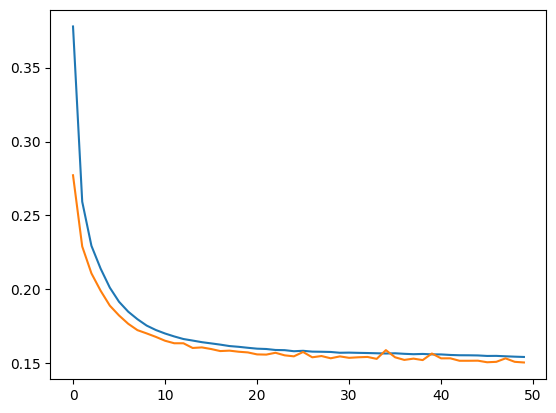

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

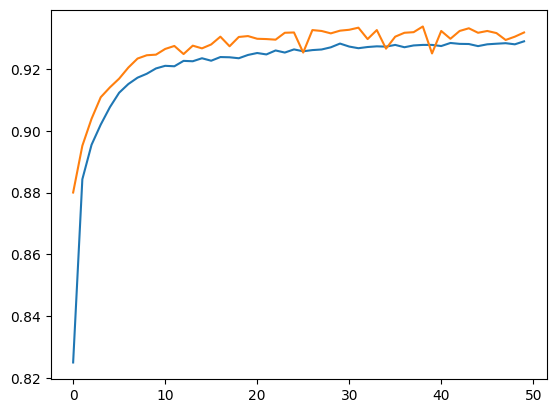

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

# batch normalized

In [25]:
model2=Sequential()
model2.add(Dense(8,activation="relu",input_dim=8))
model2.add(BatchNormalization())
model2.add(Dense(4,activation="relu"))
model2.add(BatchNormalization())
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 24 (96.00 B)

In [26]:
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [28]:
history2=model2.fit(xtrain_trans,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9279 - loss: 0.1633 - val_accuracy: 0.9413 - val_loss: 0.1364
Epoch 2/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9258 - loss: 0.1664 - val_accuracy: 0.9403 - val_loss: 0.1389
Epoch 3/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9248 - loss: 0.1657 - val_accuracy: 0.9405 - val_loss: 0.1361
Epoch 4/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9251 - loss: 0.1673 - val_accuracy: 0.9406 - val_loss: 0.1369
Epoch 5/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9256 - loss: 0.1625 - val_accuracy: 0.9391 - val_loss: 0.1386
Epoch 6/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9250 - loss: 0.1631 - val_accuracy: 0.9380 - val_loss: 0.1440
Epoch 7/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9273 - loss: 0.1615 - val_accuracy: 0.9401 - val_loss: 0.1383
Epoch 8/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9268 - loss: 0.1614 - 

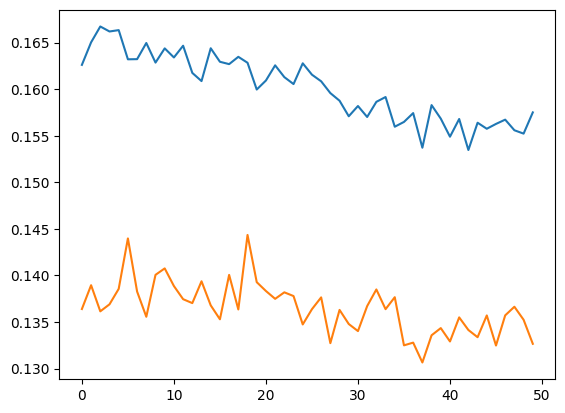

In [30]:
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])

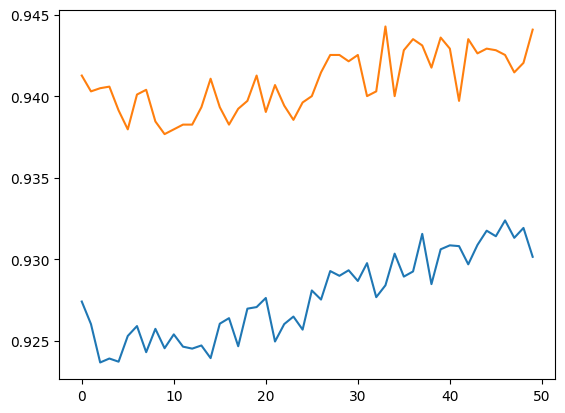

In [31]:
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])

 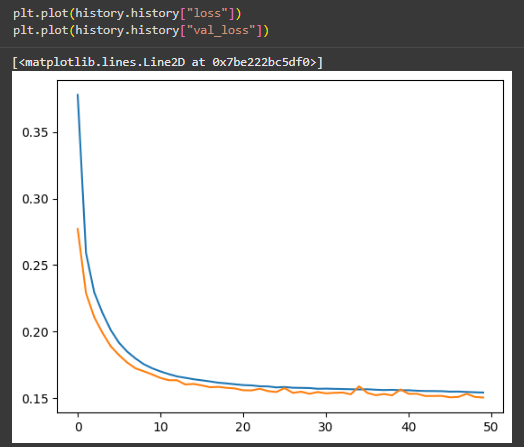
 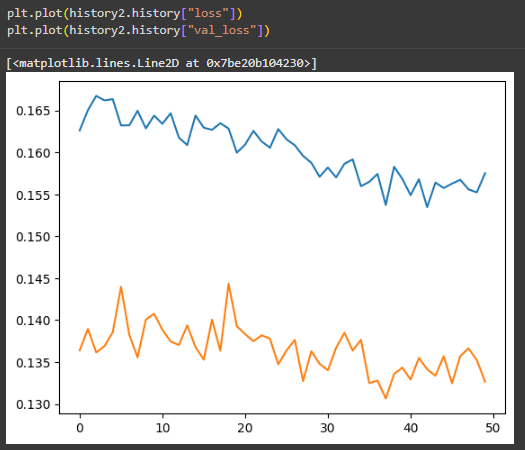

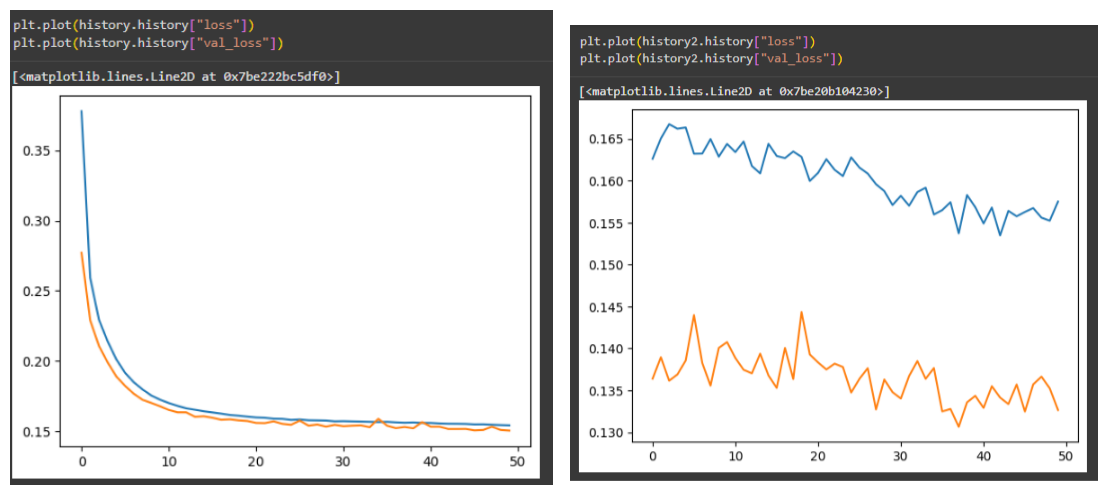

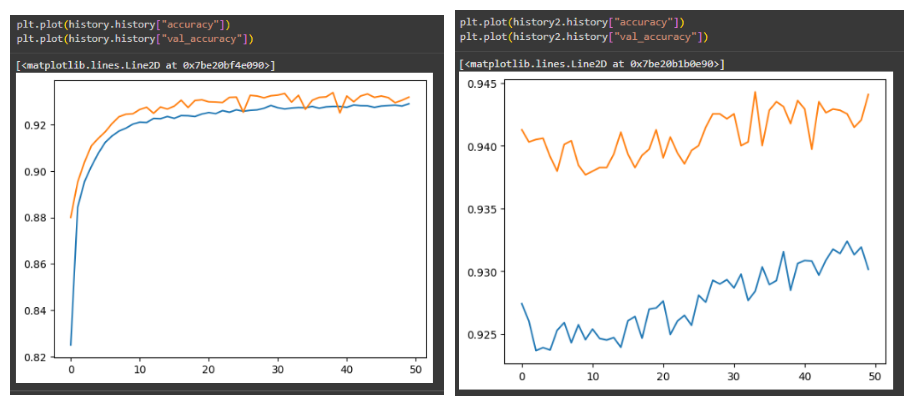